<a href="https://colab.research.google.com/github/jcs68/ChallengeAluraStoreBrj/blob/main/AluraStoreBrJosue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


Loja 1: R$ 1.534.509,12
Loja 2: R$ 1.488.459,06
Loja 3: R$ 1.464.025,03
Loja 4: R$ 1.384.497,58
Faturamento total das quatro lojas: R$ 5.871.490,79


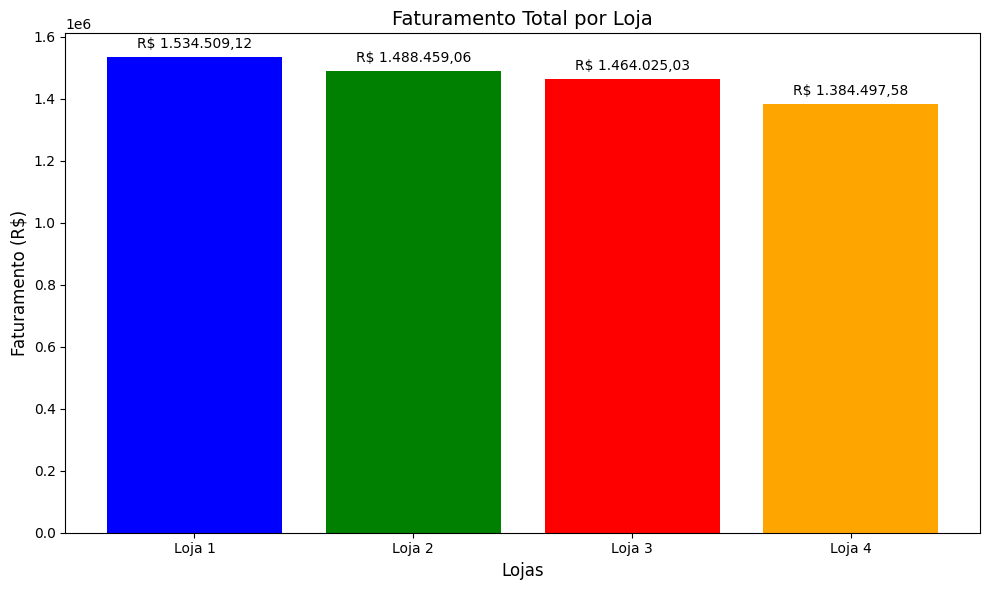

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Links dos datasets
urls = [
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"
]

# Função para formatar valores no estilo brasileiro
def formatar_valor(valor):
    return f"R$ {valor:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")

# Lendo os dados de cada loja
lojas = [pd.read_csv(url) for url in urls]

# Calculando o faturamento por loja
faturamento_por_loja = {}
for i, loja in enumerate(lojas, 1):
    loja['Preço'] = pd.to_numeric(loja['Preço'], errors='coerce').fillna(0)
    faturamento_por_loja[f"Loja {i}"] = loja['Preço'].sum()

# Calculando o faturamento total
faturamento_total = sum(faturamento_por_loja.values())

# Exibindo os resultados formatados
for loja, faturamento in faturamento_por_loja.items():
    print(f"{loja}: {formatar_valor(faturamento)}")
print(f"Faturamento total das quatro lojas: {formatar_valor(faturamento_total)}")

# Criando o gráfico de faturamento por loja
plt.figure(figsize=(10, 6))
plt.bar(faturamento_por_loja.keys(), faturamento_por_loja.values(), color=['blue', 'green', 'red', 'orange'])

# Adicionando rótulos no gráfico
for i, valor in enumerate(faturamento_por_loja.values()):
    plt.text(i, valor + 0.02 * valor, formatar_valor(valor), ha='center', fontsize=10, color='black')

# Personalizando o gráfico
plt.title("Faturamento Total por Loja", fontsize=14)
plt.ylabel("Faturamento (R$)", fontsize=12)
plt.xlabel("Lojas", fontsize=12)
plt.tight_layout()
plt.show()


# 2. Vendas por Categoria


Vendas por Categoria:
brinquedos: R$ 98.140,86
eletrodomesticos: R$ 1.766.337,03
eletronicos: R$ 2.214.099,72
esporte e lazer: R$ 190.635,39
instrumentos musicais: R$ 465.029,67
livros: R$ 50.260,74
moveis: R$ 1.010.214,00
utilidades domesticas: R$ 76.773,38


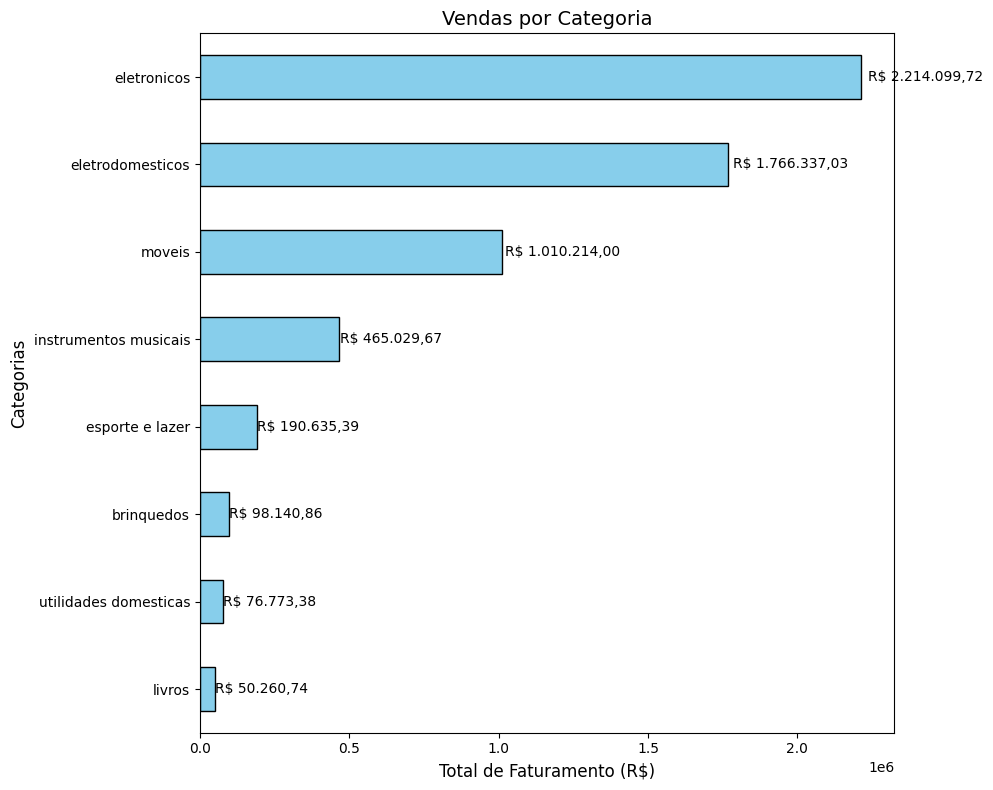

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Links dos datasets
urls = [
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"
]

# Função para formatar valores no estilo brasileiro
def formatar_valor(valor):
    return f"R$ {valor:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")

# Lendo os dados de cada loja
lojas = pd.concat([pd.read_csv(url) for url in urls], ignore_index=True)

# Calculando vendas por categoria
vendas_por_categoria = lojas.groupby('Categoria do Produto')['Preço'].sum()

# Exibindo os resultados formatados
print("Vendas por Categoria:")
for categoria, total in vendas_por_categoria.items():
    print(f"{categoria}: {formatar_valor(total)}")

# Criando um gráfico de barras horizontal
plt.figure(figsize=(10, 8))
vendas_por_categoria.sort_values(ascending=True).plot(
    kind='barh',
    color='skyblue',
    edgecolor='black'
)

# Adicionando os rótulos de valor ao lado das barras
for i, (valor, categoria) in enumerate(zip(vendas_por_categoria.sort_values(ascending=True), vendas_por_categoria.sort_values(ascending=True).index)):
    plt.text(valor + (0.01 * valor), i, formatar_valor(valor), va='center', fontsize=10, color='black')

# Personalizando o gráfico
plt.title("Vendas por Categoria", fontsize=14)
plt.xlabel("Total de Faturamento (R$)", fontsize=12)
plt.ylabel("Categorias", fontsize=12)
plt.tight_layout()
plt.show()





# 3. Média de Avaliação das Lojas

Média de Avaliação das Lojas:
Loja 1: 3.98
Loja 2: 4.04
Loja 3: 4.05
Loja 4: 4.00


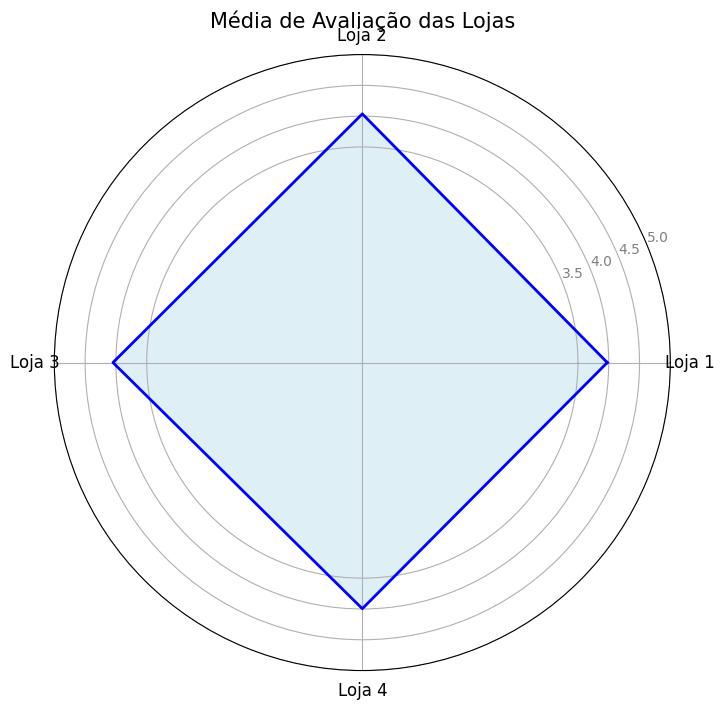

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Links dos datasets
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

# Lendo os dados das lojas
loja1 = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

# Calculando a média de avaliação por loja
avaliacao_media_lojas = {
    "Loja 1": loja1["Avaliação da compra"].mean(),
    "Loja 2": loja2["Avaliação da compra"].mean(),
    "Loja 3": loja3["Avaliação da compra"].mean(),
    "Loja 4": loja4["Avaliação da compra"].mean(),
}

# Exibindo o resultado
print("Média de Avaliação das Lojas:")
for loja, media in avaliacao_media_lojas.items():
    print(f"{loja}: {media:.2f}")

# Dados para o gráfico de radar
labels = list(avaliacao_media_lojas.keys())
values = list(avaliacao_media_lojas.values())

# Configuração do gráfico
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
values += values[:1]  # Repetir o primeiro valor para fechar o gráfico
angles += angles[:1]

# Criando o gráfico de radar
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
ax.fill(angles, values, color='lightblue', alpha=0.4)
ax.plot(angles, values, color='blue', linewidth=2)
ax.set_yticks([3.5, 4.0, 4.5, 5.0])
ax.set_yticklabels(['3.5', '4.0', '4.5', '5.0'], color="gray")
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=12, color="black")

# Título do gráfico
plt.title('Média de Avaliação das Lojas', size=15, pad=20)
plt.show()


# 4. Produtos Mais e Menos Vendidos

In [2]:
# Links dos datasets
urls = [
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv",
]

# Função para formatar os valores no estilo brasileiro
def formatar_valor(valor):
    return f"R$ {valor:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")

# Lendo os dados das lojas
lojas = [pd.read_csv(url) for url in urls]

produtos_mais_e_menos_vendidos = {}

for i, loja in enumerate(lojas, 1):
    vendas_por_produto = loja.groupby("Produto")["Preço"].sum()
    mais_vendido = vendas_por_produto.idxmax()
    menos_vendido = vendas_por_produto.idxmin()
    produtos_mais_e_menos_vendidos[f"Loja {i}"] = {
        "Mais vendido": mais_vendido,
        "Total mais vendido": formatar_valor(vendas_por_produto.max()),
        "Menos vendido": menos_vendido,
        "Total menos vendido": formatar_valor(vendas_por_produto.min()),
    }

# Exibindo os resultados
print("Produtos Mais e Menos Vendidos por Loja:")
for loja, dados in produtos_mais_e_menos_vendidos.items():
    print(f"{loja}:")
    print(f"  - Mais vendido: {dados['Mais vendido']} - Total: {dados['Total mais vendido']}")
    print(f"  - Menos vendido: {dados['Menos vendido']} - Total: {dados['Total menos vendido']}")

# Coordenadas fictícias para as lojas
coordenadas_lojas = {
    "Loja 1": {"latitude": -22.9068, "longitude": -43.1729},  # Rio de Janeiro
    "Loja 2": {"latitude": -23.5505, "longitude": -46.6333},  # São Paulo
    "Loja 3": {"latitude": -19.9167, "longitude": -43.9345},  # Belo Horizonte
    "Loja 4": {"latitude": -30.0346, "longitude": -51.2177},  # Porto Alegre
}

# Criando o mapa
mapa = folium.Map(location=[-14.2350, -51.9253], zoom_start=5)

# Adicionando marcadores ao mapa
for loja, coords in coordenadas_lojas.items():
    folium.Marker(
        [coords["latitude"], coords["longitude"]],
        popup=f"{loja}\nMais vendido: {produtos_mais_e_menos_vendidos[loja]['Mais vendido']}\n"
              f"Menos vendido: {produtos_mais_e_menos_vendidos[loja]['Menos vendido']}",
        tooltip=loja
    ).add_to(mapa)

# Visualizando o mapa diretamente no notebook
display(mapa)



Produtos Mais e Menos Vendidos por Loja:
Loja 1:
  - Mais vendido: TV Led UHD 4K - Total: R$ 189.534,28
  - Menos vendido: Corda de pular - Total: R$ 870,89
Loja 2:
  - Mais vendido: Celular Plus X42 - Total: R$ 150.967,83
  - Menos vendido: Cubo mágico 8x8 - Total: R$ 858,22
Loja 3:
  - Mais vendido: Geladeira - Total: R$ 133.185,99
  - Menos vendido: Cubo mágico 8x8 - Total: R$ 853,81
Loja 4:
  - Mais vendido: Celular Plus X42 - Total: R$ 128.930,07
  - Menos vendido: Corda de pular - Total: R$ 939,74


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 5. Frete Médio por Loja


Frete Médio por Loja:
Loja 1: R$ 34,69
Loja 2: R$ 33,62
Loja 3: R$ 33,07
Loja 4: R$ 31,28


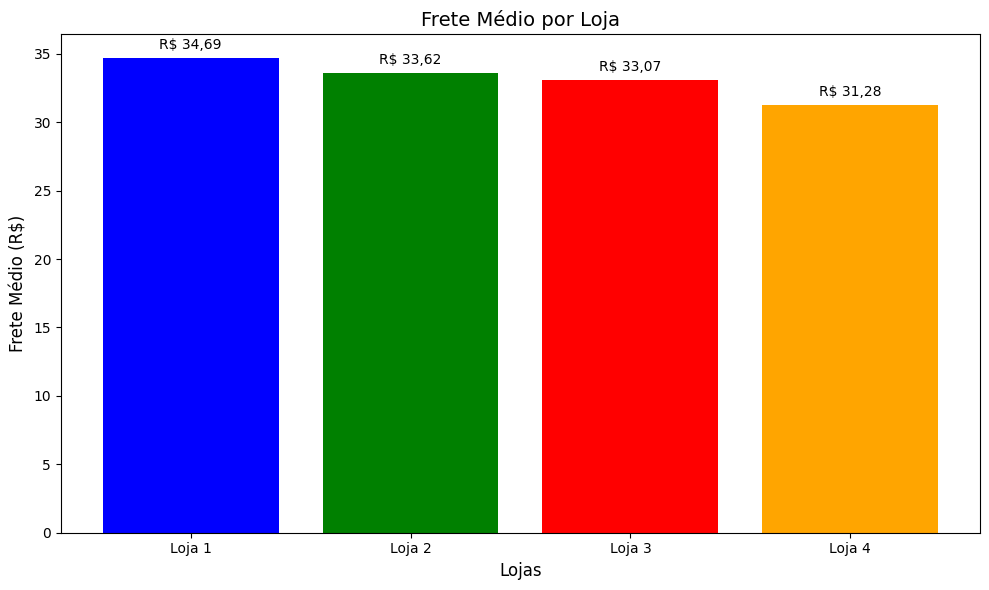

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Links dos datasets
urls = [
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv",
]

# Função para formatar valores em reais (estilo brasileiro)
def formatar_valor(valor):
    return f"R$ {valor:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")

# Lendo os dados das lojas
lojas = [pd.read_csv(url) for url in urls]

# Calculando o frete médio por loja
frete_medio_lojas = {}
for i, loja in enumerate(lojas, 1):
    frete_medio_lojas[f"Loja {i}"] = loja["Frete"].mean()

# Exibindo os resultados formatados
print("Frete Médio por Loja:")
for loja, frete in frete_medio_lojas.items():
    print(f"{loja}: {formatar_valor(frete)}")

# Criando o gráfico de barras para frete médio por loja
plt.figure(figsize=(10, 6))
plt.bar(frete_medio_lojas.keys(), frete_medio_lojas.values(), color=["blue", "green", "red", "orange"])

# Adicionando rótulos nos gráficos
for i, valor in enumerate(frete_medio_lojas.values()):
    plt.text(i, valor + 0.02 * valor, formatar_valor(valor), ha='center', fontsize=10, color='black')

# Personalizando o gráfico
plt.title("Frete Médio por Loja", fontsize=14)
plt.ylabel("Frete Médio (R$)", fontsize=12)
plt.xlabel("Lojas", fontsize=12)
plt.tight_layout()
plt.show()



# 6. Relatório Final

Relatório Final: Análise de Desempenho das Lojas

Introdução

Este relatório tem como objetivo analisar o desempenho das quatro lojas do Senhor João, utilizando métricas-chave como faturamento total, categorias de produtos mais e menos vendidas, média de avaliação dos clientes, produtos mais e menos vendidos, e frete médio. A partir das análises realizadas, será recomendada a venda de uma loja, de forma estratégica e justificada, para financiar um investimento futuro.

Desenvolvimento
Faturamento Total

A Loja 1 apresenta o maior faturamento total entre todas as lojas, mostrando um bom desempenho financeiro.

Já a Loja 4 possui o menor faturamento total, indicando baixa geração de receita comparada às demais.

Categorias de Produtos Mais e Menos Vendidas

As categorias mais vendidas estão distribuídas entre as lojas. No entanto, observa-se que a Loja 4 tem menor relevância nas principais categorias de alta performance, o que impacta negativamente seu faturamento.

Média de Avaliação dos Clientes

A Loja 1 possui a menor média de avaliação dos clientes (3.98), o que pode indicar problemas na experiência do consumidor ou nos serviços oferecidos.

Embora tenha bom faturamento, a baixa satisfação dos clientes é um ponto de atenção que pode impactar sua competitividade no futuro.

Produtos Mais e Menos Vendidos

A Loja 4 concentra produtos com menor relevância nas vendas, enquanto os produtos mais vendidos estão predominantemente distribuídos em outras lojas.

Frete Médio

A Loja 4 apresenta o menor frete médio (R$31.28), o que pode ser positivo para os clientes. Porém, isso não é suficiente para superar seu baixo faturamento e relevância de categorias e produtos.

Conclusão
Embora a Loja 1 tenha desafios relacionados à satisfação dos clientes, o maior faturamento torna estratégica a sua manutenção. Por outro lado, a Loja 4 se destaca negativamente em múltiplos aspectos:

Menor faturamento total, impactando diretamente o retorno financeiro.

Baixa relevância nas categorias e produtos vendidos, prejudicando a sua competitividade.

Apesar de oferecer o menor frete médio, os resultados gerais da loja não justificam sua continuidade.

Recomenda-se, portanto, a venda da Loja 4 para financiar o investimento do Senhor João, permitindo focar em lojas mais lucrativas e com maior potencial de crescimento.

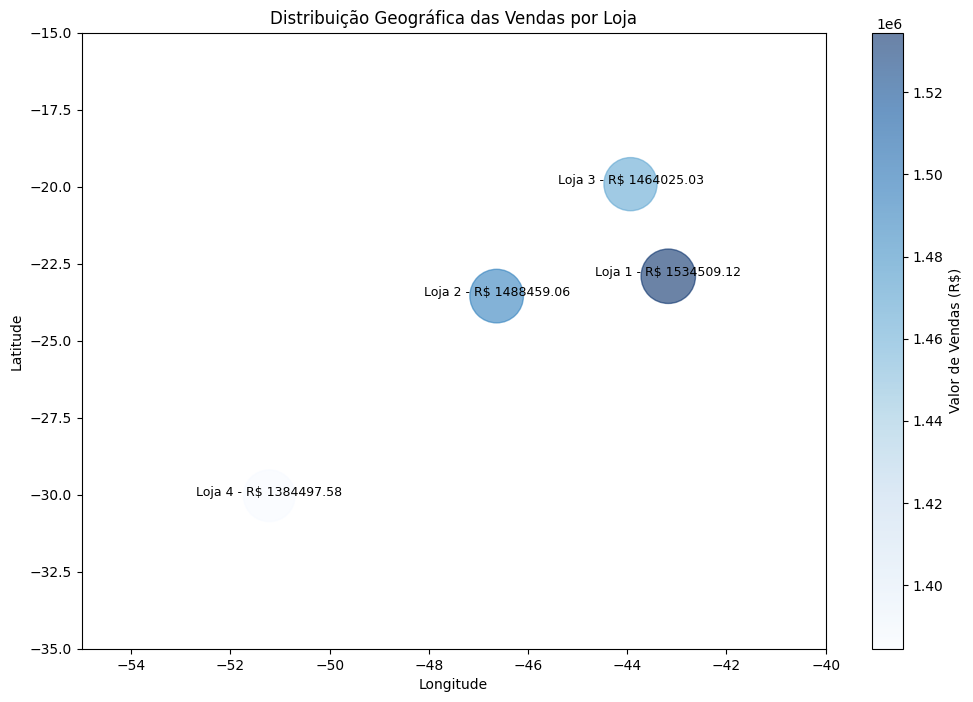

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

# Links dos datasets
urls = [
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv",
]

# Lendo os dados das lojas
lojas = [pd.read_csv(url) for url in urls]

# Coordenadas fictícias para as lojas
coordenadas_lojas = {
    "Loja 1": {"latitude": -22.9068, "longitude": -43.1729},  # Rio de Janeiro
    "Loja 2": {"latitude": -23.5505, "longitude": -46.6333},  # São Paulo
    "Loja 3": {"latitude": -19.9167, "longitude": -43.9345},  # Belo Horizonte
    "Loja 4": {"latitude": -30.0346, "longitude": -51.2177},  # Porto Alegre
}

# Criando DataFrame com coordenadas e valores de vendas
dados_vendas = pd.DataFrame([
    {"Loja": loja, "latitude": coords["latitude"], "longitude": coords["longitude"], "valor_vendas": lojas[i]["Preço"].sum()}
    for i, (loja, coords) in enumerate(coordenadas_lojas.items())
])

# Ajustando os limites do gráfico para centralizar as informações
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    dados_vendas['longitude'],
    dados_vendas['latitude'],
    s=dados_vendas['valor_vendas'] / 1000,
    c=dados_vendas['valor_vendas'],
    cmap="Blues",
    alpha=0.6
)
plt.colorbar(scatter, label="Valor de Vendas (R$)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Distribuição Geográfica das Vendas por Loja")
plt.xlim(-55, -40)  # Ajuste dos limites de longitude
plt.ylim(-35, -15)  # Ajuste dos limites de latitude

# Adicionando legendas no gráfico
for i, row in dados_vendas.iterrows():
    plt.text(
        row['longitude'],
        row['latitude'],
        f"{row['Loja']} - R$ {row['valor_vendas']:.2f}",
        fontsize=9,
        ha='center',
        color='black'
    )

plt.show()

# Criando mapa interativo com Folium
mapa = folium.Map(location=[-22.0, -50.0], zoom_start=4)

# Adicionando marcadores ao mapa
for _, row in dados_vendas.iterrows():
    folium.Marker(
        [row['latitude'], row['longitude']],
        popup=f"Loja: {row['Loja']}\nVendas: R$ {row['valor_vendas']:.2f}",
        tooltip=row['Loja']
    ).add_to(mapa)

# Gerando mapa de calor (Heatmap)
heat_data = [[row['latitude'], row['longitude'], row['valor_vendas']] for _, row in dados_vendas.iterrows()]
HeatMap(heat_data).add_to(mapa)

# Visualizando o mapa diretamente no notebook
from IPython.display import display
display(mapa)
